In [1]:
#import libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [2]:
#Training, Performace evaluation and Ploting
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    trainedforest = RandomForestClassifier(class_weight='balanced').fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    fpr_rf, tpr_rf, _ = roc_curve(Y_Test, predictionforest)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [3]:
#Reading Data File
df = pd.read_csv('Mini_dataset_Binders_Non_Binders_for_ml.csv')

In [4]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction; PCA dimention reduction
X = df.drop(['Category','Category_0_1','Category_0-1_2_3_4','Category_0_1-2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y) 
sfm = SelectFromModel(randomforest, prefit=True)
X = sfm.transform(X)

Base Non-Tranformed data
[[20  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.84      0.91      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


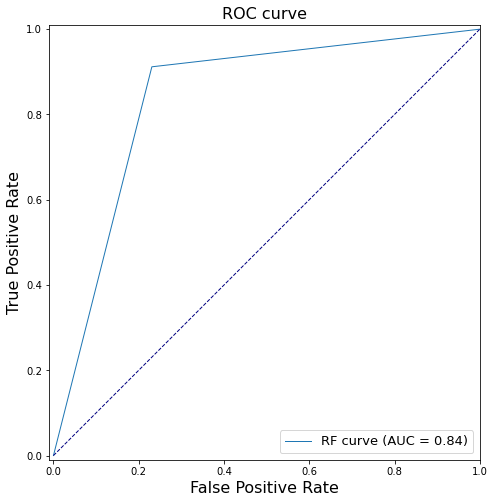

PCA Transformed - 2 dimensions is :-
[7.00475547 2.65470509]
[[19  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.79      0.79      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


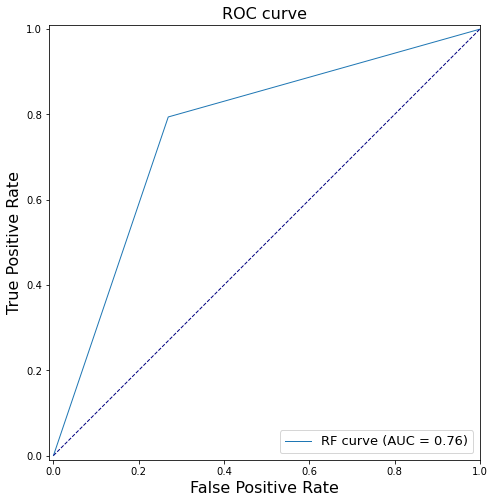

PCA Transformed - 3 dimensions is :-
[7.00475547 2.65470509 1.14917259]
[[19  7]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.80      0.82      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


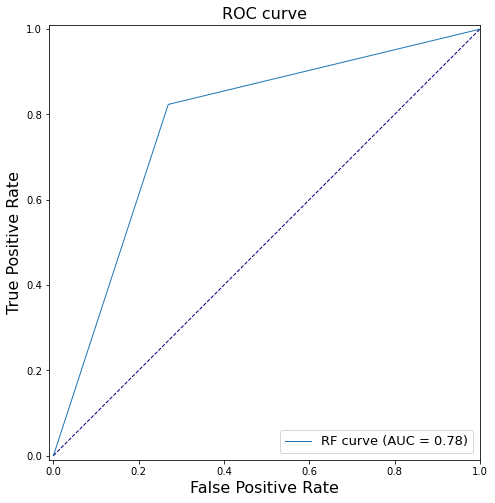

PCA Transformed - 4 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642]
[[20  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.83      0.88      0.86        34

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


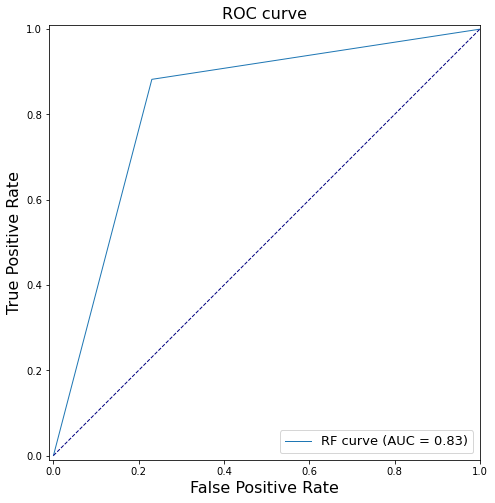

PCA Transformed - 5 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363]
[[20  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.85      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


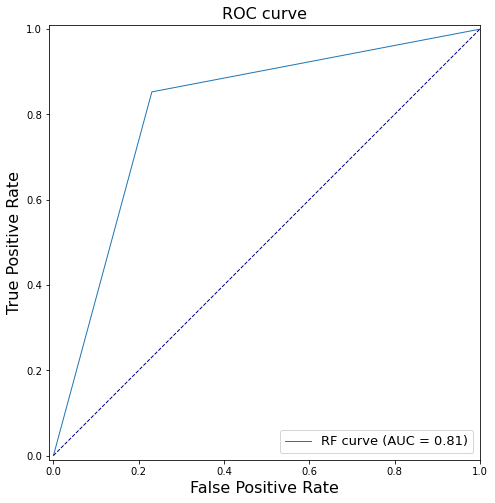

PCA Transformed - 6 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122]
[[20  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.81      0.76      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


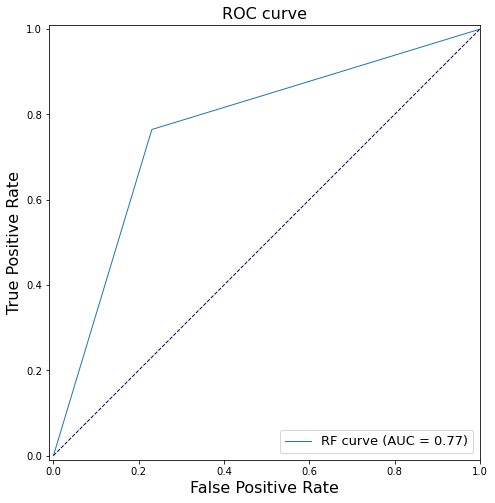

PCA Transformed - 7 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424]
[[20  6]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.82      0.82      0.82        34

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


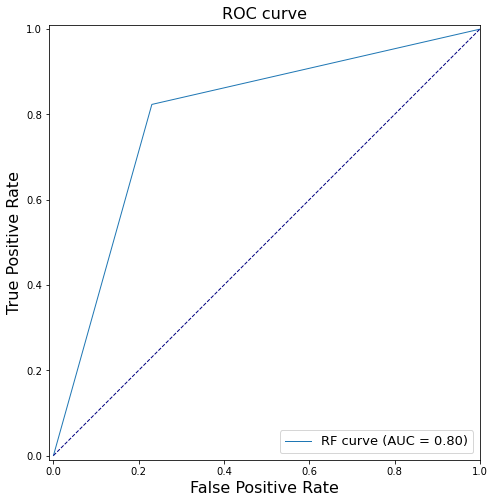

PCA Transformed - 8 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483]
[[19  7]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.80      0.82      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


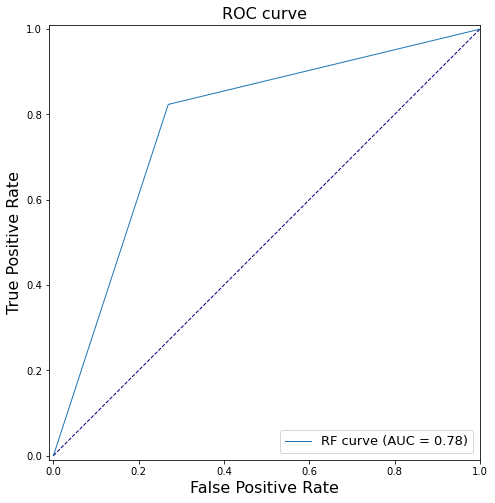

PCA Transformed - 9 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903]
[[18  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.78      0.85      0.82        34

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


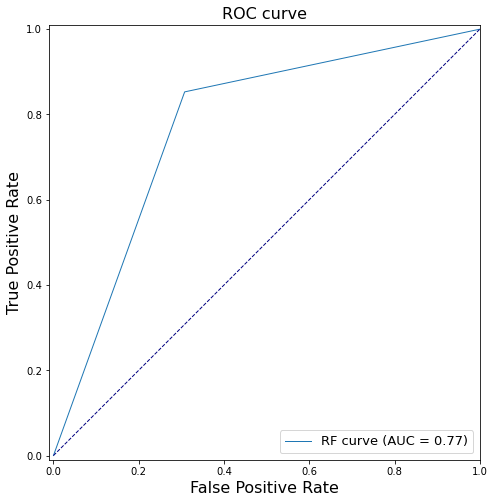

PCA Transformed - 10 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476]
[[18  8]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.77      0.79      0.78        34

    accuracy                           0.75        60
   macro avg       0.75      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


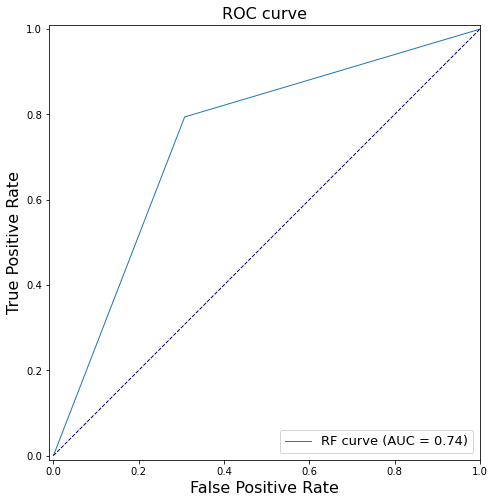

PCA Transformed - 11 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369]
[[18  8]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        26
           1       0.79      0.88      0.83        34

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


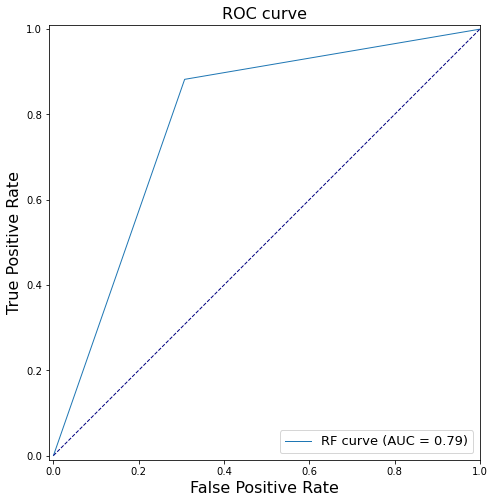

PCA Transformed - 12 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969 ]
[[18  8]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.78      0.82      0.80        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


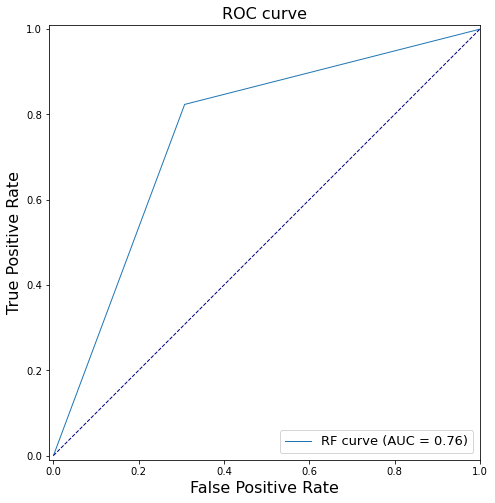

PCA Transformed - 13 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695]
[[18  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.78      0.85      0.82        34

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


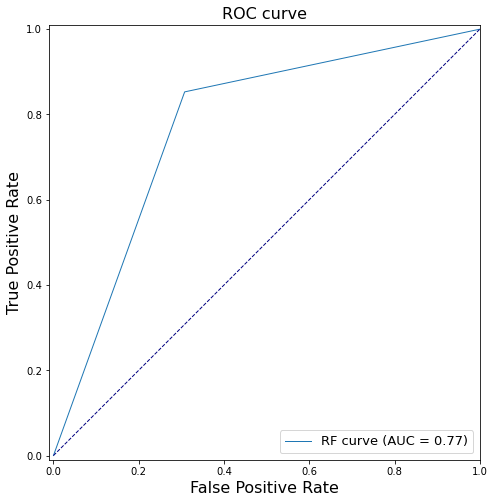

PCA Transformed - 14 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361]
[[18  8]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.77      0.79      0.78        34

    accuracy                           0.75        60
   macro avg       0.75      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


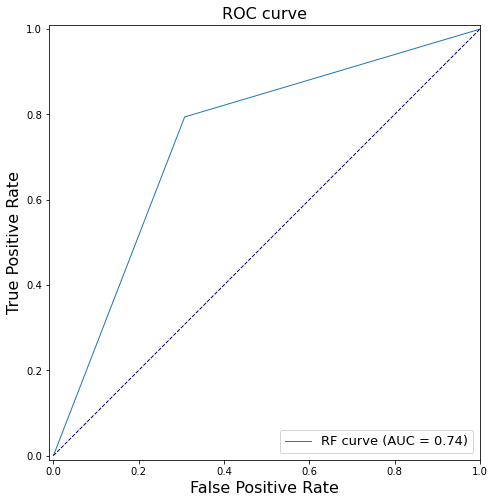

PCA Transformed - 15 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292]
[[19  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.79      0.79      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


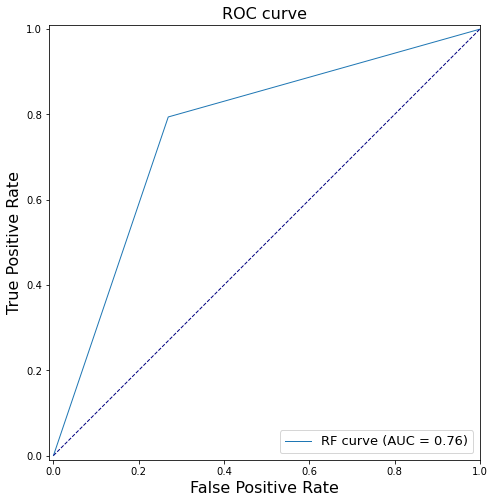

PCA Transformed - 16 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174]
[[20  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.81      0.76      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


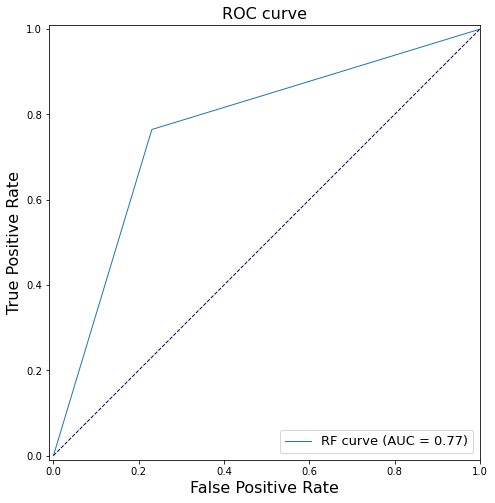

PCA Transformed - 17 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174 0.04507079]
[[20  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.81      0.76      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


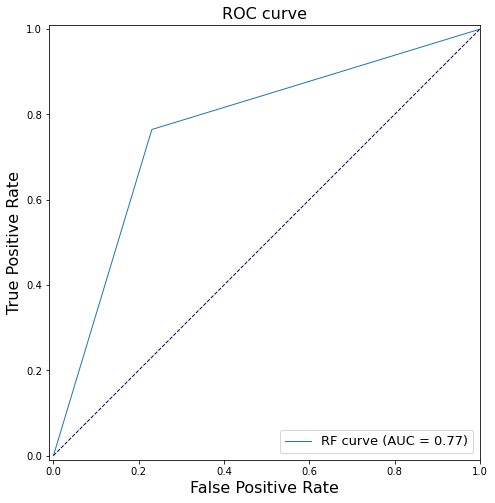

PCA Transformed - 18 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174 0.04507079 0.04229359]
[[19  7]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.81      0.88      0.85        34

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


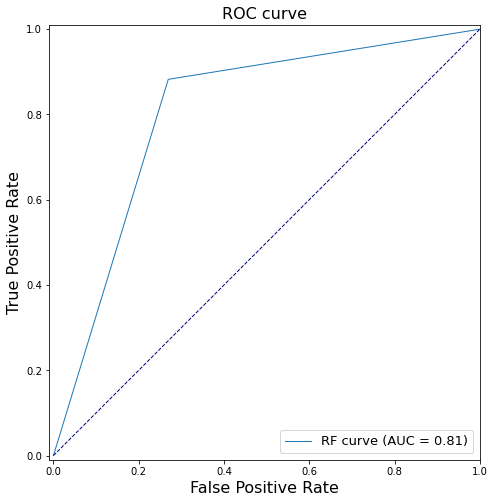

PCA Transformed - 19 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174 0.04507079 0.04229359
 0.03114958]
[[19  7]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.78      0.74      0.76        34

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


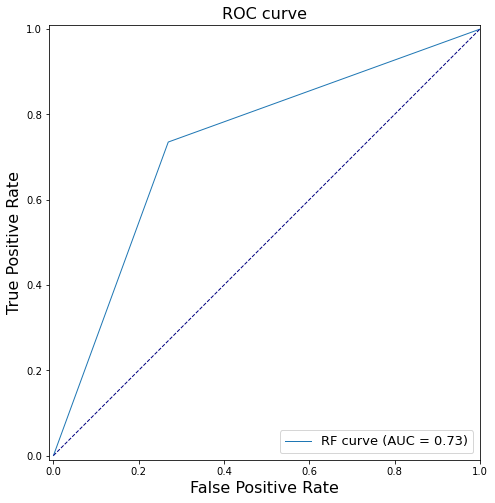

PCA Transformed - 20 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174 0.04507079 0.04229359
 0.03114958 0.02743542]
[[18  8]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.78      0.82      0.80        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


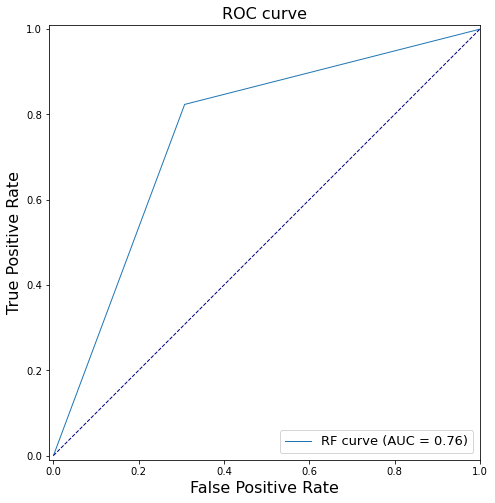

PCA Transformed - 21 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174 0.04507079 0.04229359
 0.03114958 0.02743542 0.01790472]
[[20  6]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        26
           1       0.82      0.79      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


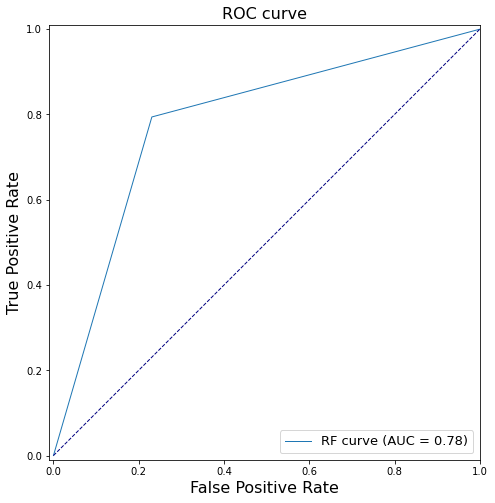

PCA Transformed - 22 dimensions is :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122
 0.40272424 0.28822483 0.22256903 0.18848476 0.15861369 0.1146969
 0.09847695 0.08080361 0.07709292 0.06693174 0.04507079 0.04229359
 0.03114958 0.02743542 0.01790472 0.01203154]
[[20  6]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        26
           1       0.82      0.79      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


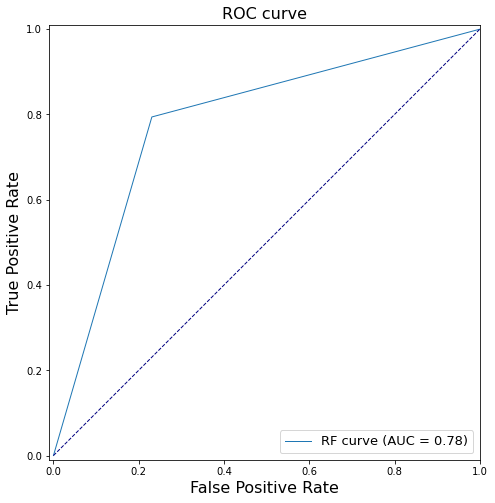

PCA Transformed - 23 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03]
[[21  5]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.82      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


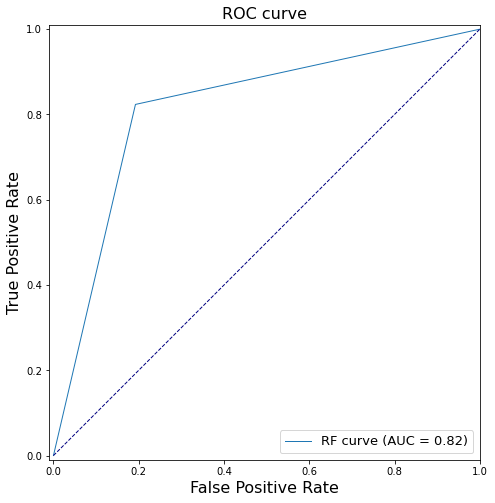

PCA Transformed - 24 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03]
[[19  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.79      0.79      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


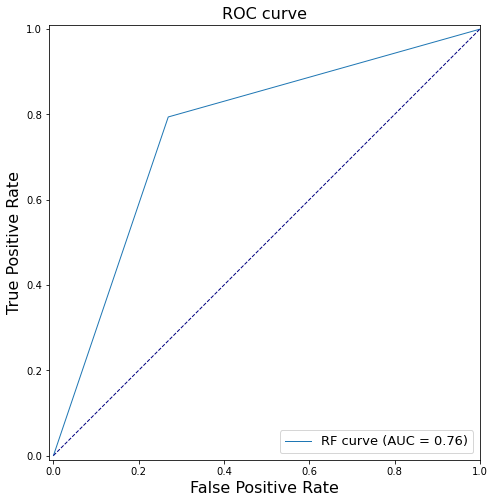

PCA Transformed - 25 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03]
[[20  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.85      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


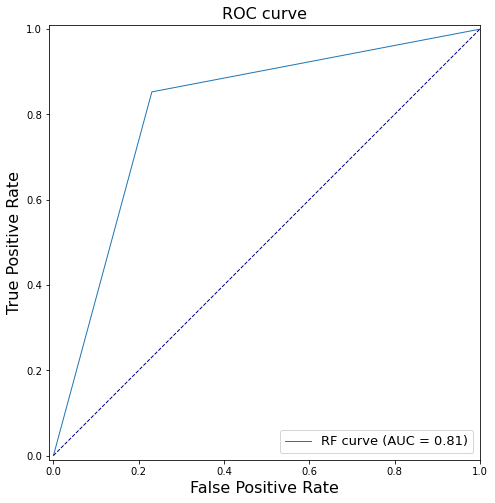

PCA Transformed - 26 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04]
[[19  7]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.81      0.85      0.83        34

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


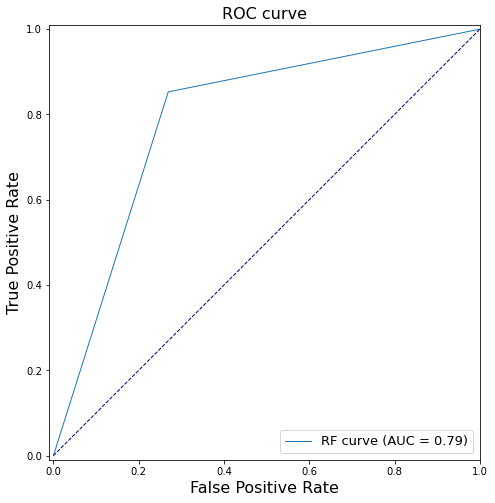

PCA Transformed - 27 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04]
[[21  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.86      0.88      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


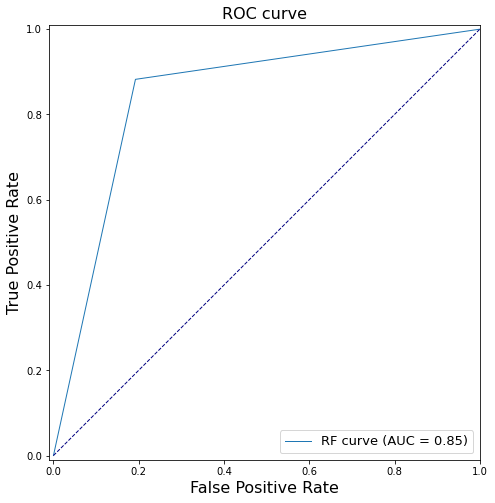

PCA Transformed - 28 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04]
[[20  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.83      0.88      0.86        34

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


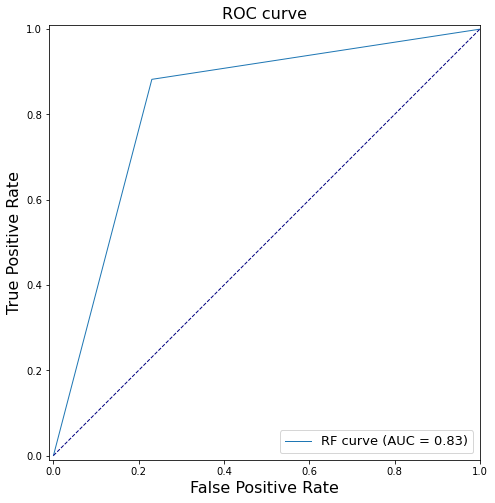

PCA Transformed - 29 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04
 1.42032513e-04]
[[20  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.81      0.76      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


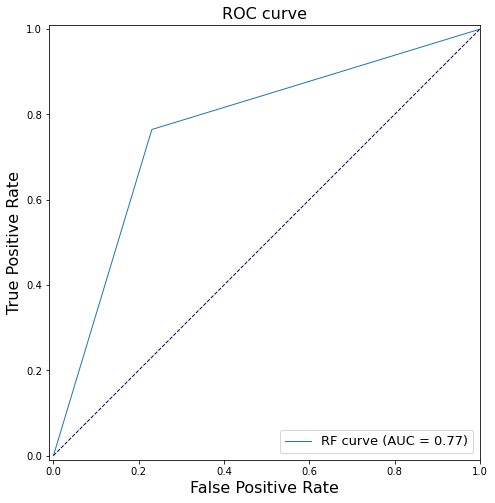

PCA Transformed - 30 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04
 1.42032513e-04 9.72600681e-05]
[[19  7]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.81      0.85      0.83        34

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


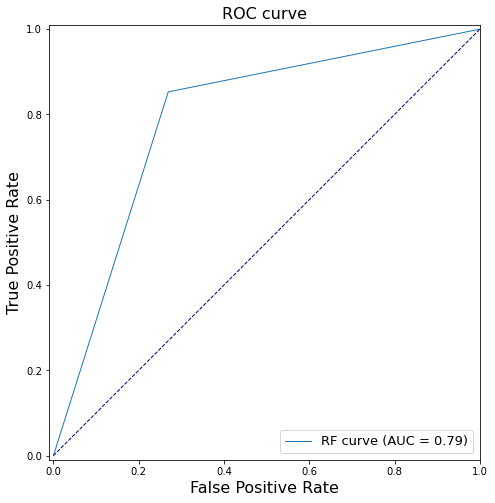

PCA Transformed - 31 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04
 1.42032513e-04 9.72600681e-05 5.76890793e-05]
[[19  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.79      0.79      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


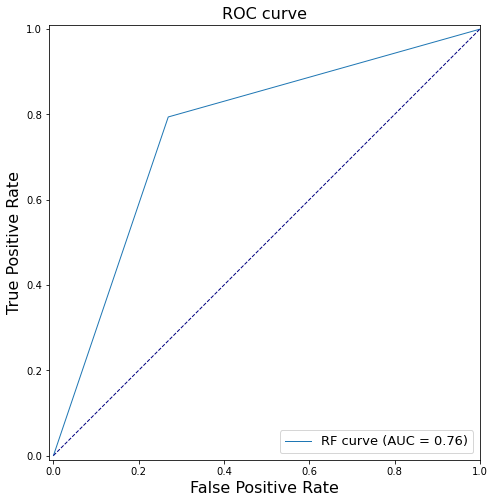

PCA Transformed - 32 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04
 1.42032513e-04 9.72600681e-05 5.76890793e-05 4.25219542e-05]
[[22  4]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.87      0.76      0.81        34

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


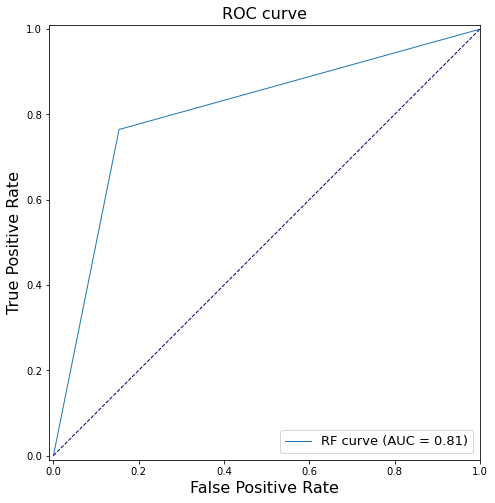

PCA Transformed - 33 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04
 1.42032513e-04 9.72600681e-05 5.76890793e-05 4.25219542e-05
 2.97902242e-05]
[[21  5]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.82      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


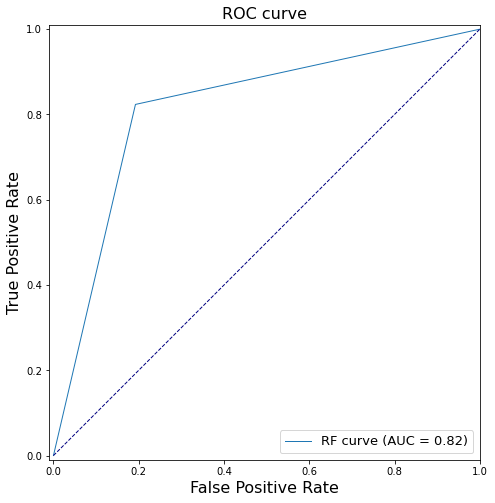

PCA Transformed - 34 dimensions is :-
[7.00475547e+00 2.65470509e+00 1.14917259e+00 1.04964642e+00
 8.09143634e-01 5.77081217e-01 4.02724239e-01 2.88224833e-01
 2.22569031e-01 1.88484765e-01 1.58613687e-01 1.14696898e-01
 9.84769542e-02 8.08036125e-02 7.70929224e-02 6.69317356e-02
 4.50707941e-02 4.22935882e-02 3.11495847e-02 2.74354196e-02
 1.79047219e-02 1.20315386e-02 2.74311886e-03 2.17905701e-03
 1.77127236e-03 8.50439313e-04 4.30316028e-04 2.04866262e-04
 1.42032513e-04 9.72600681e-05 5.76890793e-05 4.25219542e-05
 2.97902242e-05 1.37968641e-05]
[[23  3]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        26
           1       0.89      0.74      0.81        34

    accuracy                           0.80        60
   macro avg       0.81      0.81      0.80        60
weighted avg       0.82      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


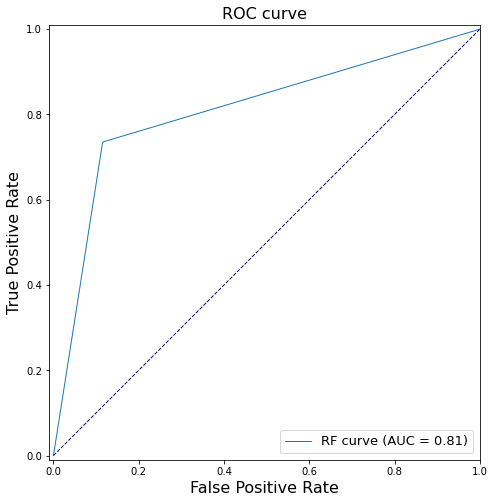

In [5]:
#Checking for best PCA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (2,35):
    pca = PCA(n_components=i,svd_solver='full')
    X_pca = pca.fit_transform(X)
    print("PCA Transformed - "+str(i)+ " dimensions is :-" )
    print(pca.explained_variance_)
    forest_test(X_pca, Y)

PCA Transformed Best is in 6 dimensions Resulting in :-
[7.00475547 2.65470509 1.14917259 1.04964642 0.80914363 0.57708122]
[[19  7]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.81      0.88      0.85        34

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


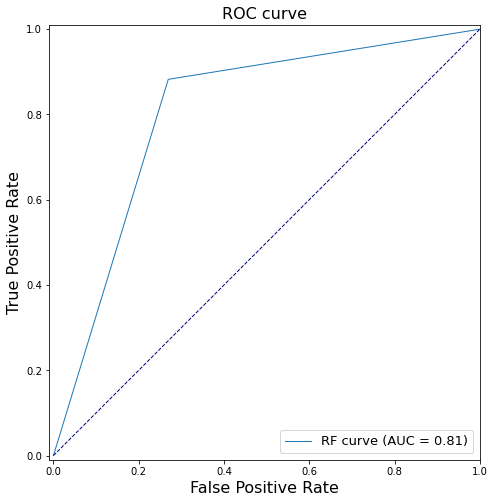

In [9]:
#Plotting Best PCA
pca = PCA(n_components=6,svd_solver='full')
X_pca = pca.fit_transform(X)
print("PCA Transformed Best is in 6 dimensions Resulting in :-" )
print(pca.explained_variance_)
forest_test(X_pca, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.893356
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.375965
[t-SNE] KL divergence after 600 iterations: 0.284839
[[20  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.84      0.91      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


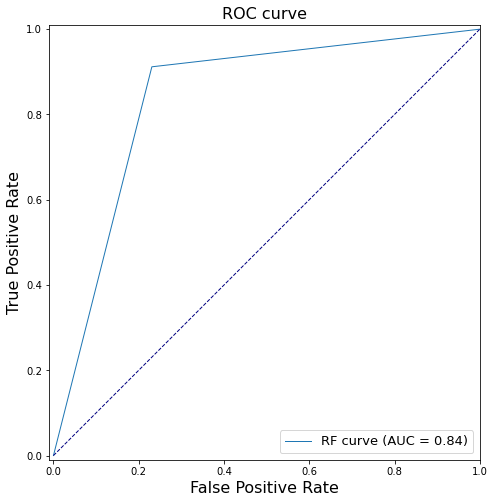

In [26]:
#tSNE dimension reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
X_tsne = tsne.fit_transform(X)
forest_test(X_tsne, Y)

Base Non-Tranformed data
[[19  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        34

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


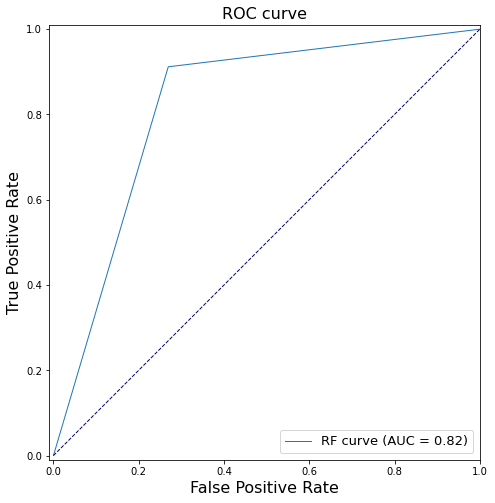

LLE Transformed - 1 dimensions is :-
[[17  9]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        26
           1       0.76      0.82      0.79        34

    accuracy                           0.75        60
   macro avg       0.75      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


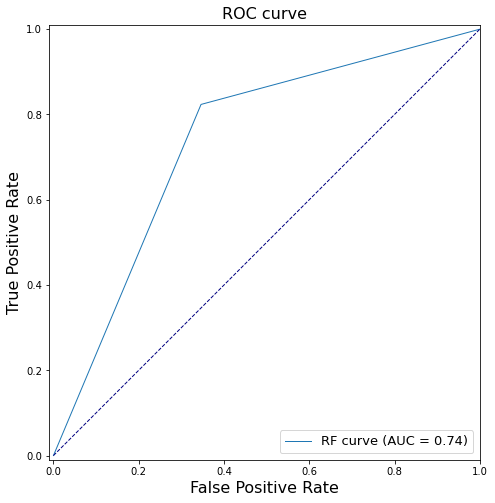

LLE Transformed - 2 dimensions is :-
[[17  9]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        26
           1       0.76      0.82      0.79        34

    accuracy                           0.75        60
   macro avg       0.75      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


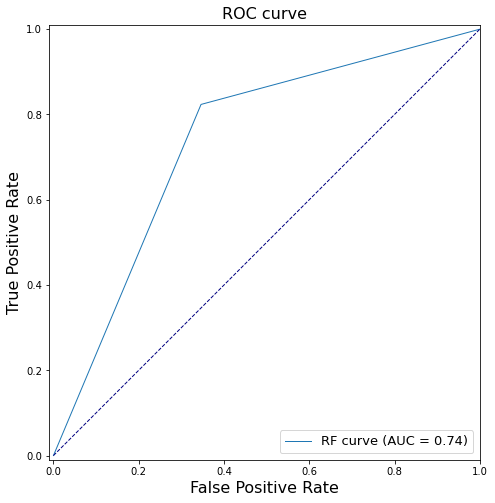

LLE Transformed - 3 dimensions is :-
[[17  9]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        26
           1       0.74      0.76      0.75        34

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


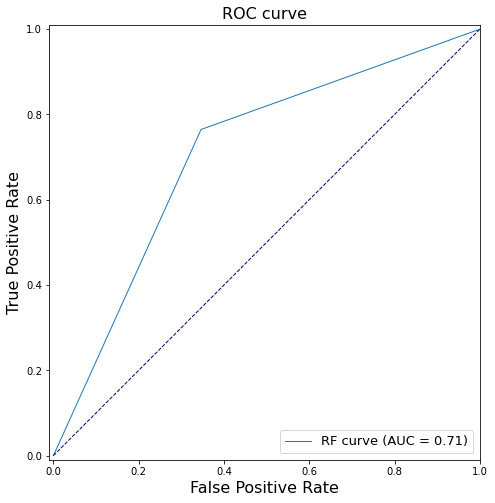

LLE Transformed - 4 dimensions is :-
[[17  9]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.75      0.79      0.77        34

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.73      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


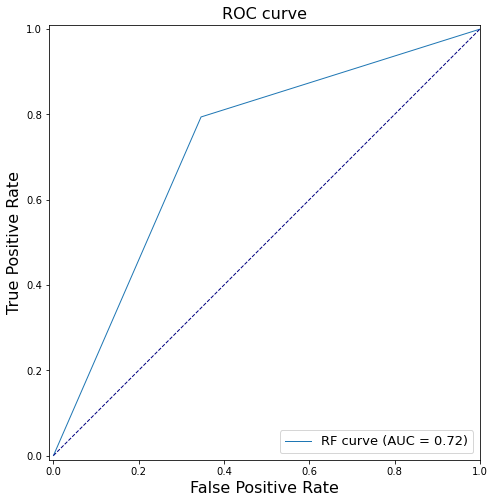

LLE Transformed - 5 dimensions is :-
[[16 10]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        26
           1       0.73      0.79      0.76        34

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.71        60
weighted avg       0.71      0.72      0.71        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


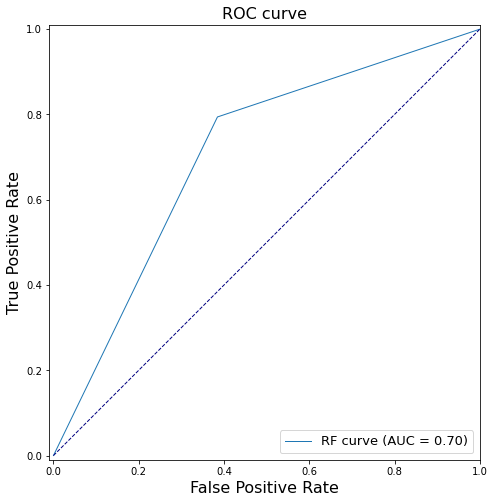

LLE Transformed - 6 dimensions is :-
[[17  9]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.74      0.74      0.74        34

    accuracy                           0.70        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


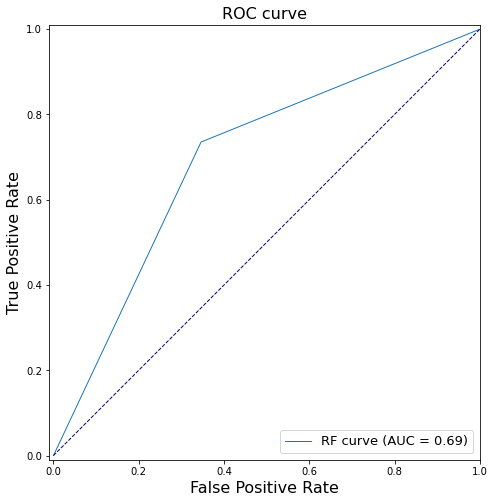

LLE Transformed - 7 dimensions is :-
[[18  8]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.76      0.76      0.76        34

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


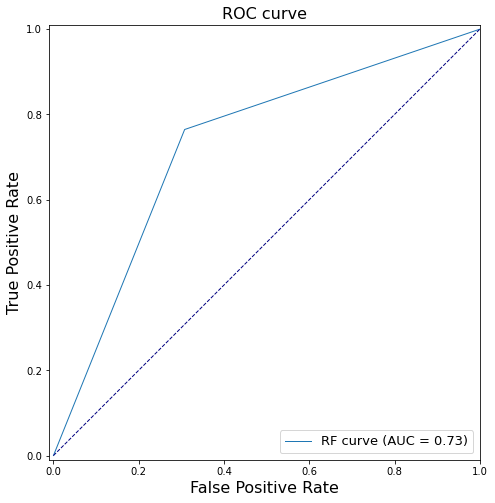

LLE Transformed - 8 dimensions is :-
[[18  8]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.76      0.76      0.76        34

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


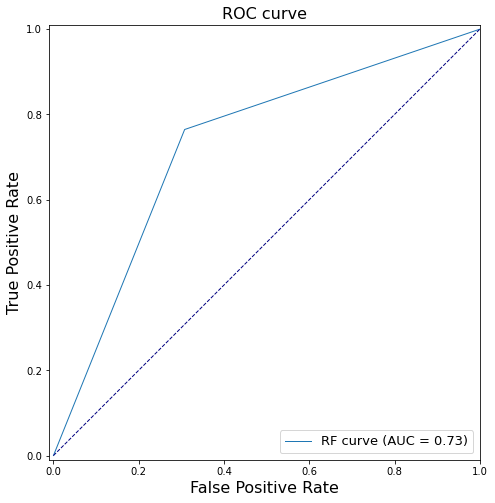

LLE Transformed - 9 dimensions is :-
[[17  9]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.76      0.85      0.81        34

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.77      0.77      0.76        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


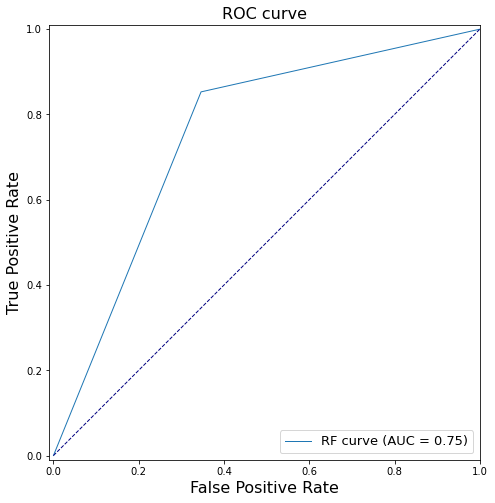

LLE Transformed - 10 dimensions is :-
[[17  9]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.76      0.85      0.81        34

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.77      0.77      0.76        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


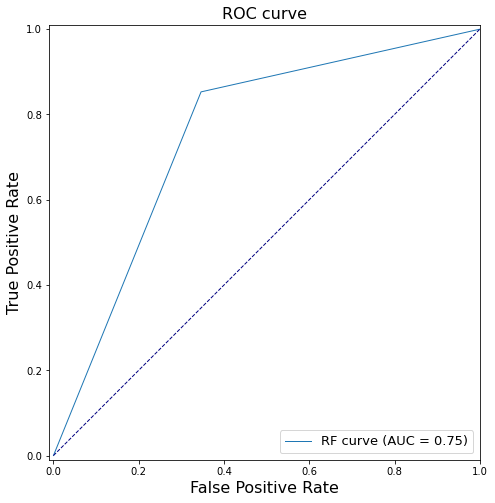

LLE Transformed - 11 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


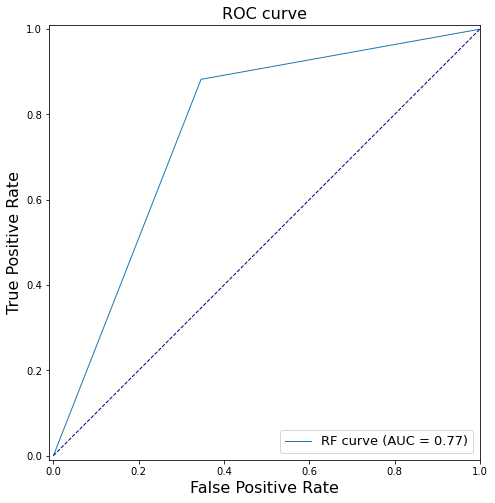

LLE Transformed - 12 dimensions is :-
[[17  9]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.76      0.85      0.81        34

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.77      0.77      0.76        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


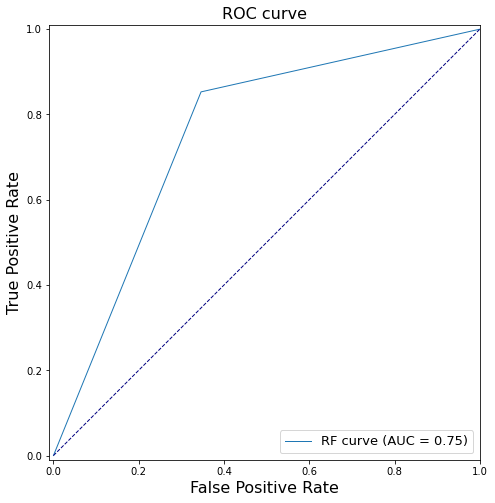

LLE Transformed - 13 dimensions is :-
[[17  9]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.76      0.85      0.81        34

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.77      0.77      0.76        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


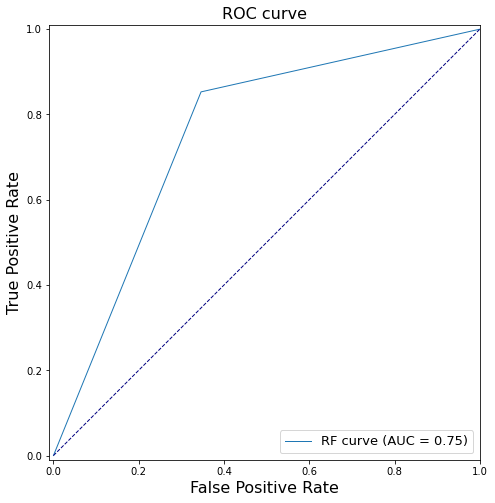

LLE Transformed - 14 dimensions is :-
[[17  9]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.76      0.85      0.81        34

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.77      0.77      0.76        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


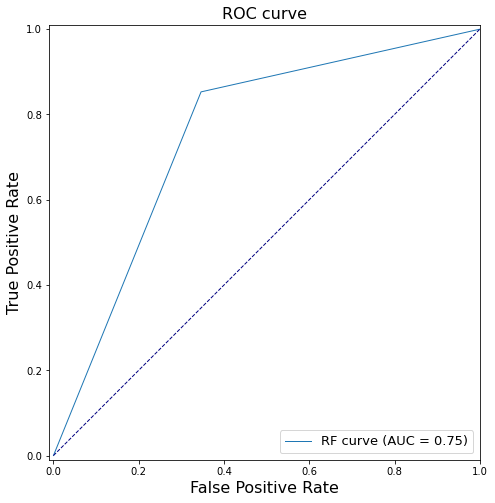

LLE Transformed - 15 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


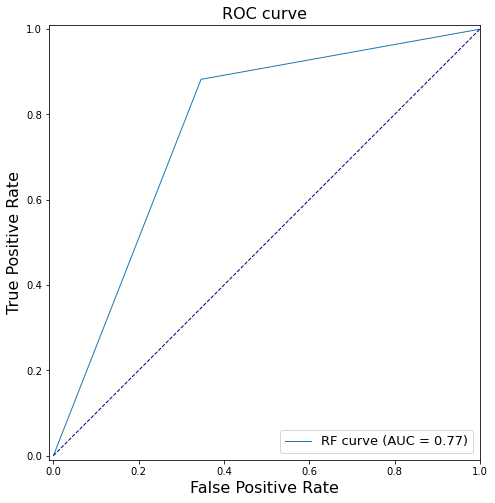

LLE Transformed - 16 dimensions is :-
[[19  7]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.80      0.82      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


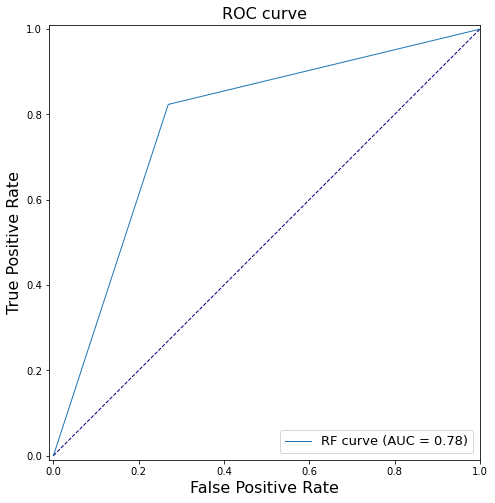

LLE Transformed - 17 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


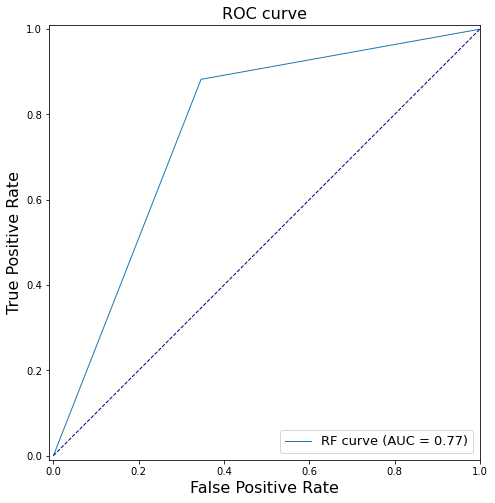

LLE Transformed - 18 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


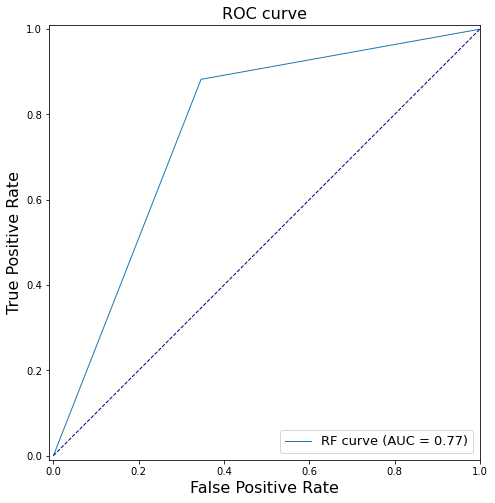

LLE Transformed - 19 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


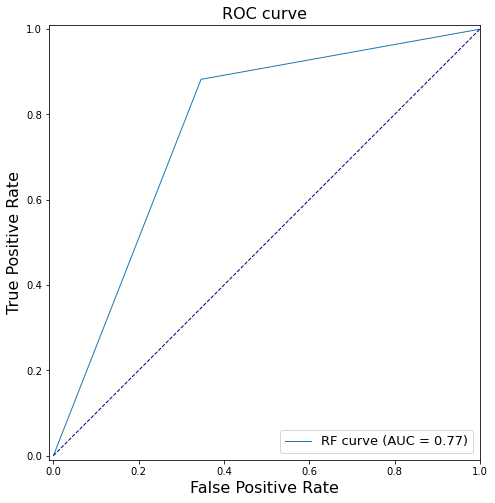

LLE Transformed - 20 dimensions is :-
[[17  9]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.78      0.91      0.84        34

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.79        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


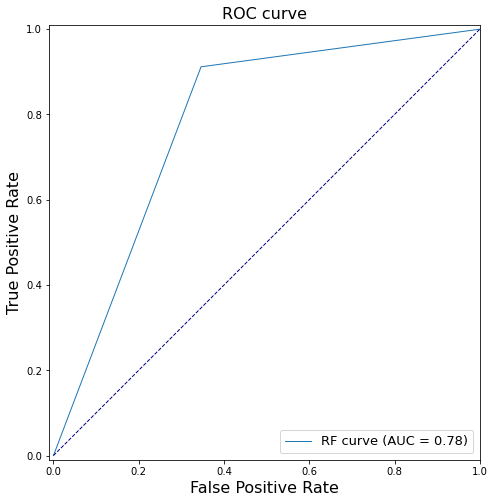

LLE Transformed - 21 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


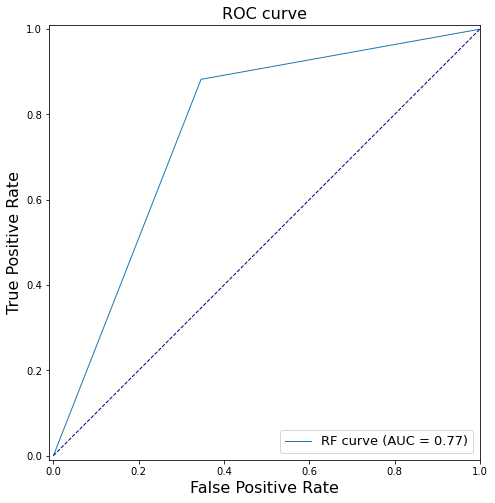

LLE Transformed - 22 dimensions is :-
[[17  9]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.78      0.91      0.84        34

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.79        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


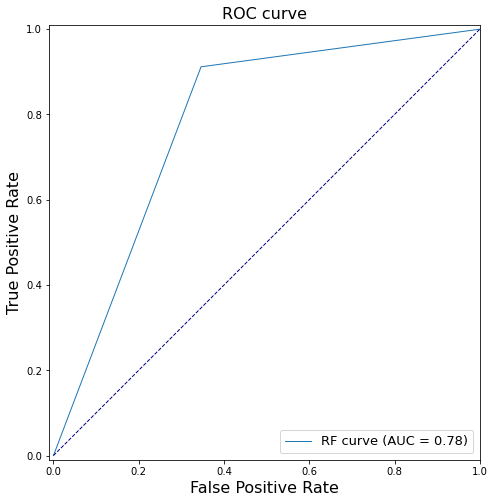

LLE Transformed - 23 dimensions is :-
[[17  9]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.78      0.91      0.84        34

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.79        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


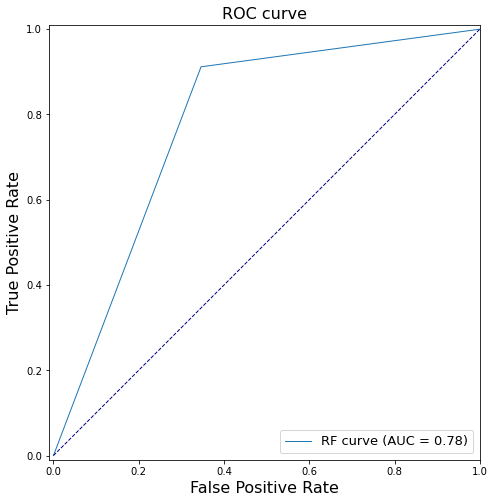

LLE Transformed - 24 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


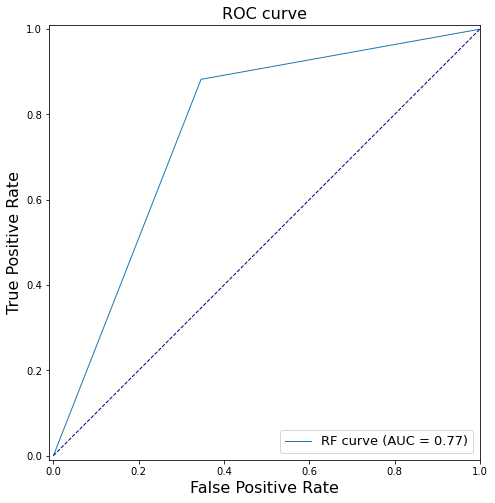

LLE Transformed - 25 dimensions is :-
[[18  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.79      0.91      0.85        34

    accuracy                           0.82        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.82      0.82      0.81        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


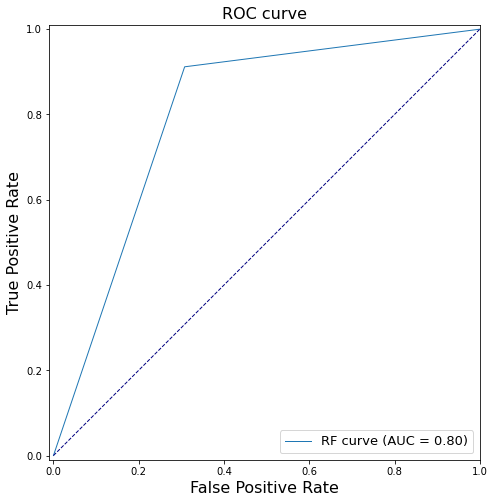

LLE Transformed - 26 dimensions is :-
[[18  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.79      0.91      0.85        34

    accuracy                           0.82        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.82      0.82      0.81        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


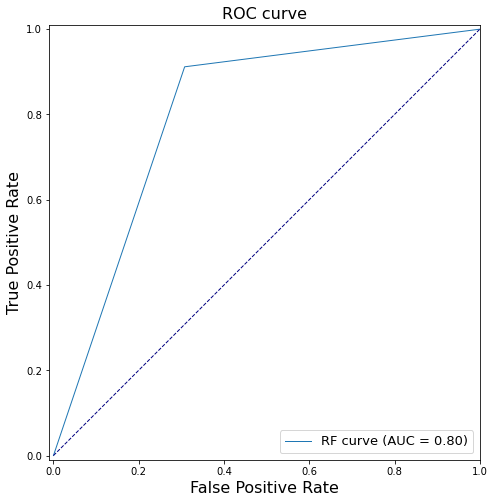

LLE Transformed - 27 dimensions is :-
[[17  9]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.78      0.94      0.85        34

    accuracy                           0.82        60
   macro avg       0.84      0.80      0.80        60
weighted avg       0.83      0.82      0.81        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


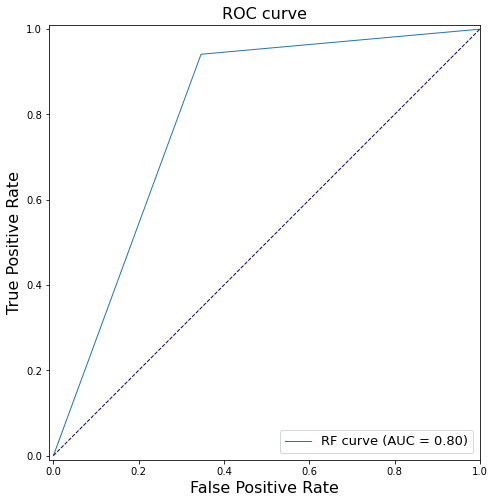

LLE Transformed - 28 dimensions is :-
[[17  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.77      0.88      0.82        34

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


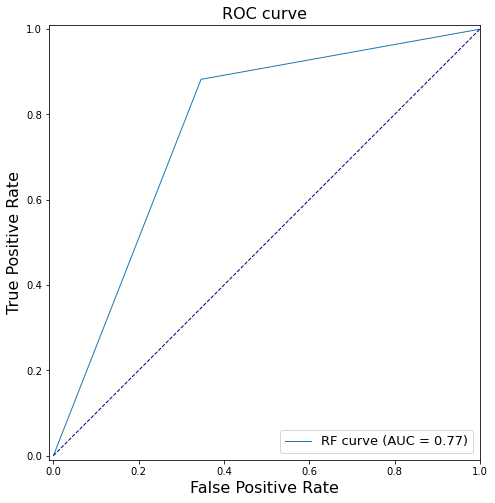

LLE Transformed - 29 dimensions is :-
[[17  9]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.78      0.91      0.84        34

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.79        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


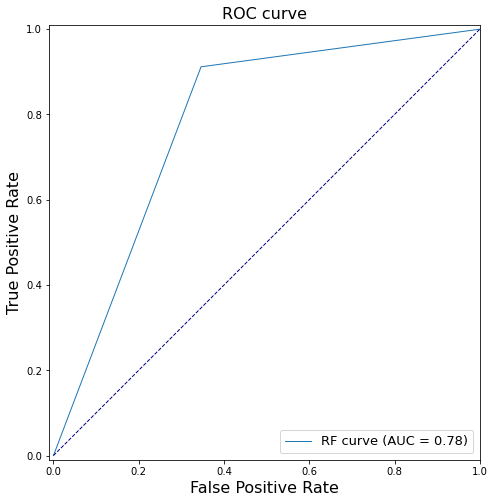

In [6]:
#Checking for best LLE dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (1,30):
    embedding = LocallyLinearEmbedding(n_components=i)

# run an LLE and use it to transform the features
    X_lle = embedding.fit_transform(X)
    print("LLE Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_lle, Y)

Best performing LLE Transformed - is in 25 dimensions:-
[[18  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.79      0.91      0.85        34

    accuracy                           0.82        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.82      0.82      0.81        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


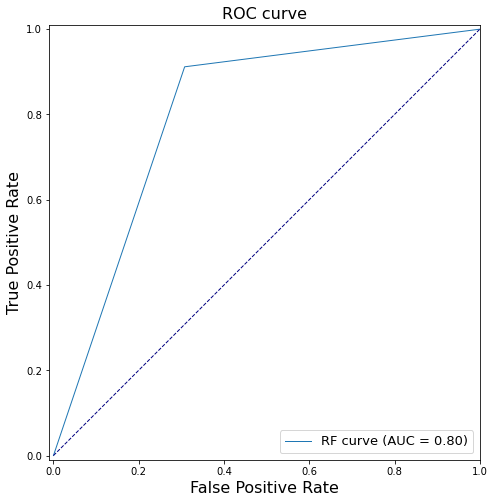

In [10]:
#Plotting Best LLE
embedding = LocallyLinearEmbedding(n_components=25)
X_lle = embedding.fit_transform(X)
print("Best performing LLE Transformed - is in 25 dimensions:-" )
forest_test(X_lle, Y)

LDA Transformed Best is in 1 dimensions is :-
[[21  5]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.82      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


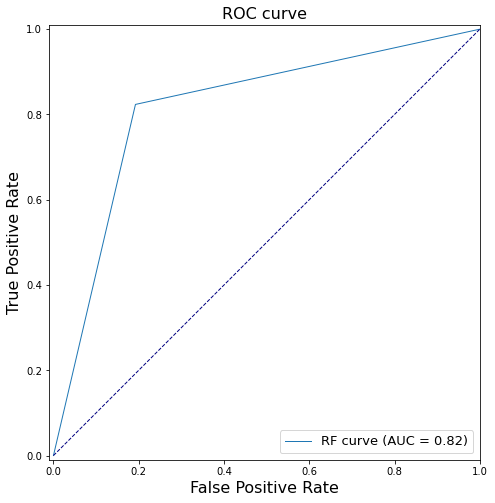

In [12]:
#Plotting Best LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print("LDA Transformed Best is in 1 dimensions is :-" )
forest_test(X_lda, Y)

Base Non-Tranformed data
[[19  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        34

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


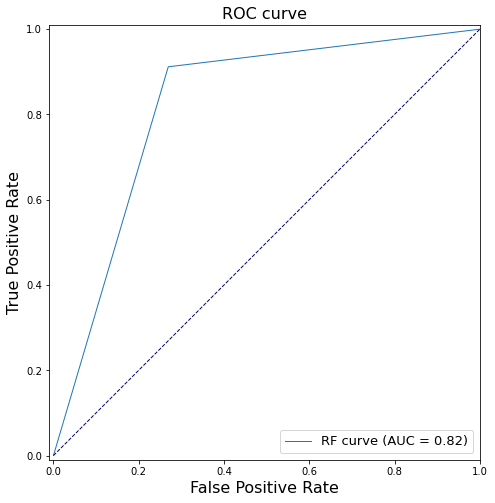

ICA Transformed - 3 dimensions is :-
[[21  5]
 [10 24]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        26
           1       0.83      0.71      0.76        34

    accuracy                           0.75        60
   macro avg       0.75      0.76      0.75        60
weighted avg       0.76      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


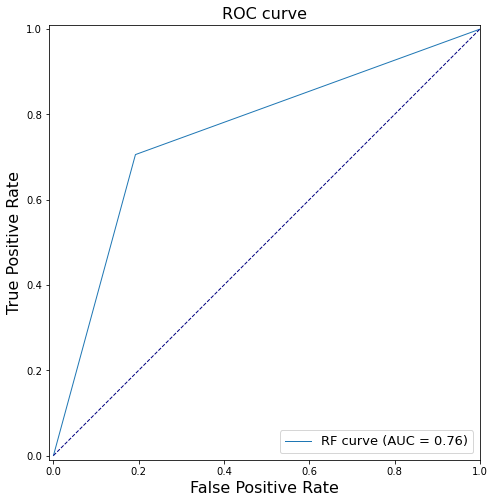

ICA Transformed - 4 dimensions is :-
[[21  5]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.82      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


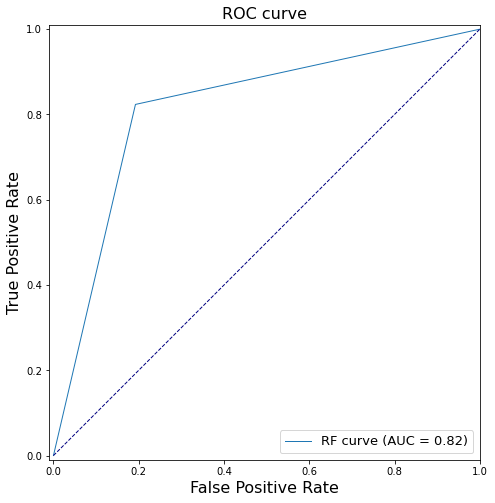

ICA Transformed - 5 dimensions is :-
[[18  8]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.77      0.79      0.78        34

    accuracy                           0.75        60
   macro avg       0.75      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


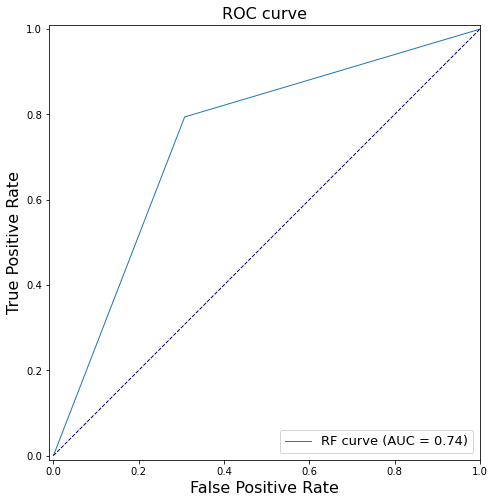

ICA Transformed - 6 dimensions is :-
[[20  6]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.82      0.82      0.82        34

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


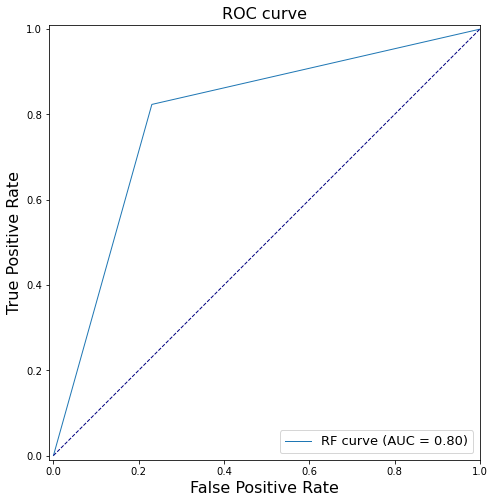

ICA Transformed - 7 dimensions is :-
[[22  4]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.85      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


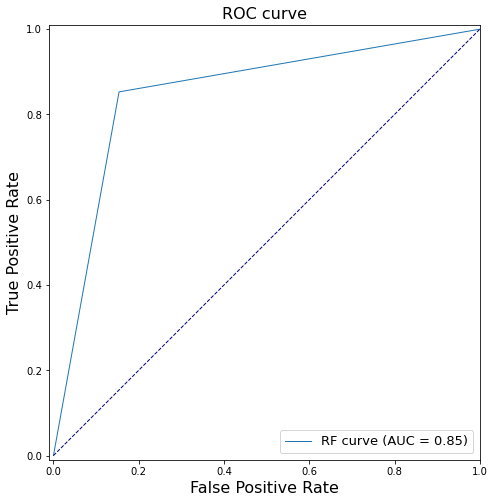

ICA Transformed - 8 dimensions is :-
[[20  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.85      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


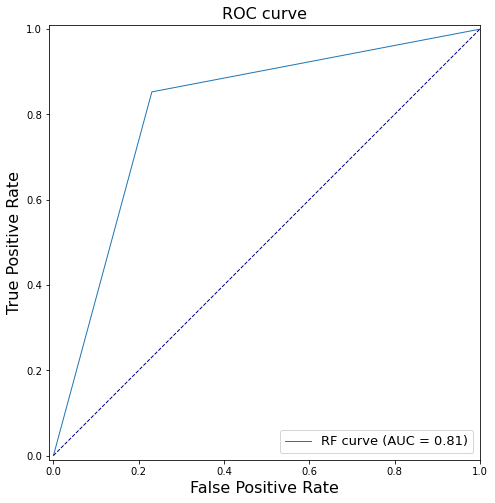

ICA Transformed - 9 dimensions is :-
[[20  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.85      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


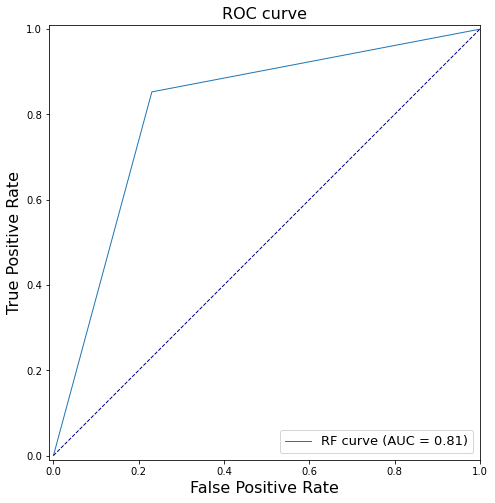

ICA Transformed - 10 dimensions is :-
[[22  4]
 [10 24]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.86      0.71      0.77        34

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.78      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


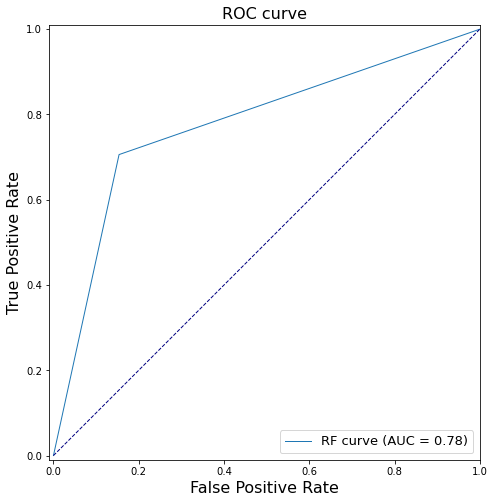

ICA Transformed - 11 dimensions is :-
[[22  4]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.87      0.76      0.81        34

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


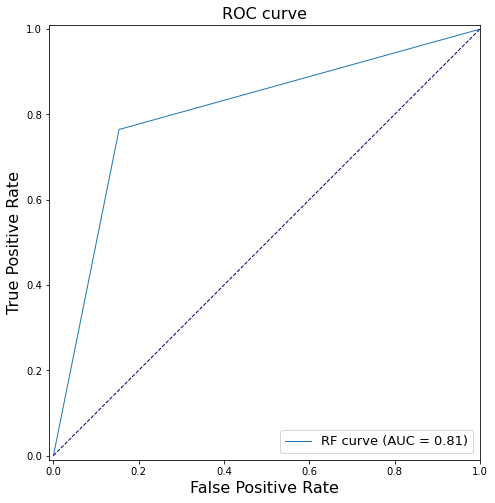

ICA Transformed - 12 dimensions is :-
[[19  7]
 [14 20]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.64        26
           1       0.74      0.59      0.66        34

    accuracy                           0.65        60
   macro avg       0.66      0.66      0.65        60
weighted avg       0.67      0.65      0.65        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


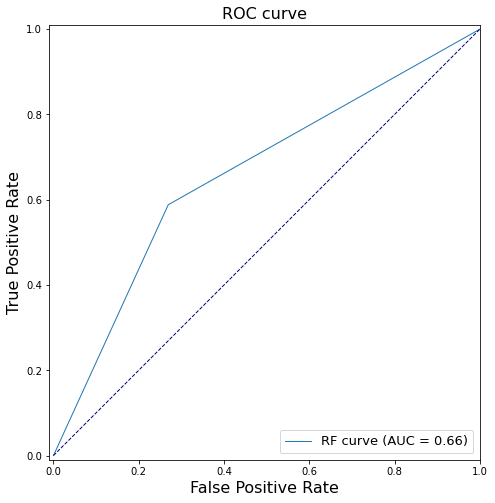

ICA Transformed - 13 dimensions is :-
[[21  5]
 [10 24]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        26
           1       0.83      0.71      0.76        34

    accuracy                           0.75        60
   macro avg       0.75      0.76      0.75        60
weighted avg       0.76      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


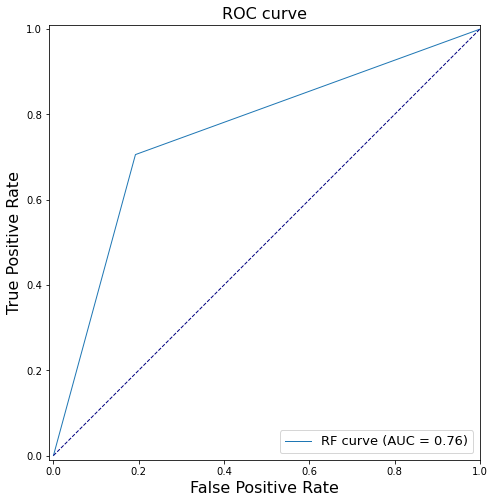

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 14 dimensions is :-
[[21  5]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.76      0.80        34

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


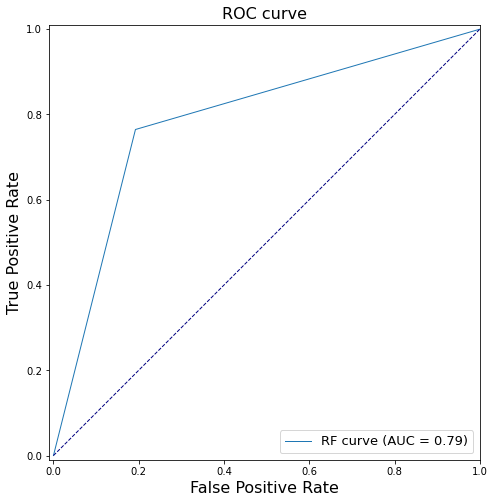

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 15 dimensions is :-
[[20  6]
 [10 24]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        26
           1       0.80      0.71      0.75        34

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


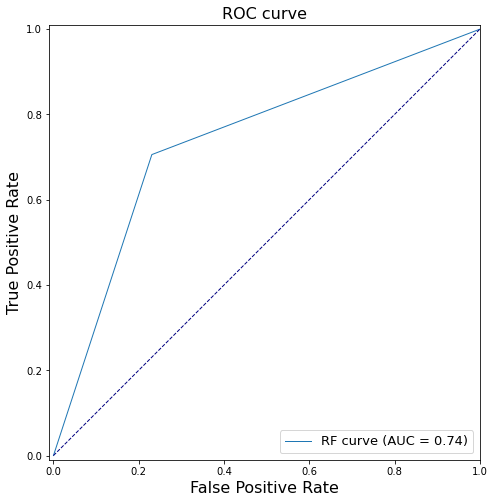

ICA Transformed - 16 dimensions is :-
[[22  4]
 [10 24]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.86      0.71      0.77        34

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.78      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


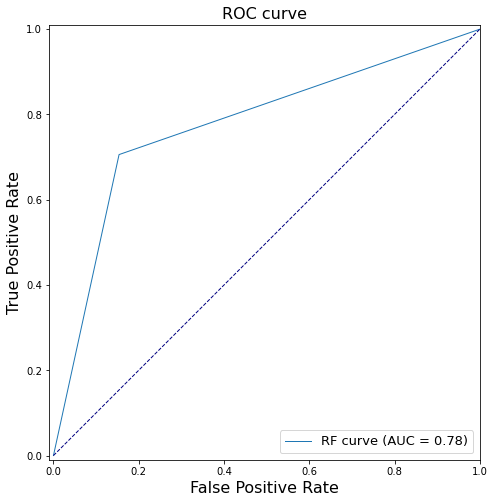

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 17 dimensions is :-
[[21  5]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        26
           1       0.83      0.74      0.78        34

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


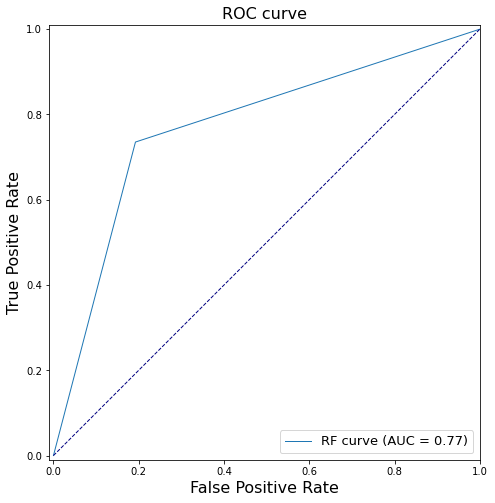

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 18 dimensions is :-
[[20  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.81      0.76      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


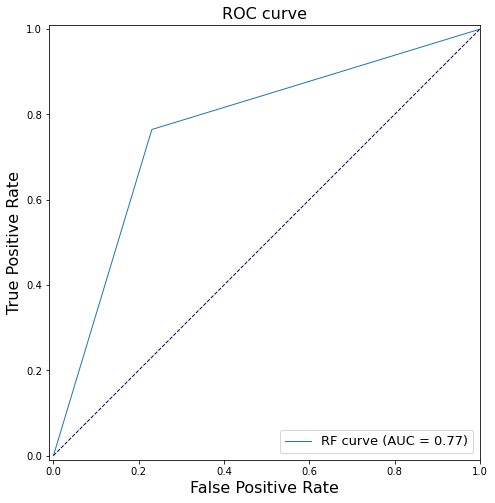

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 19 dimensions is :-
[[20  6]
 [10 24]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        26
           1       0.80      0.71      0.75        34

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


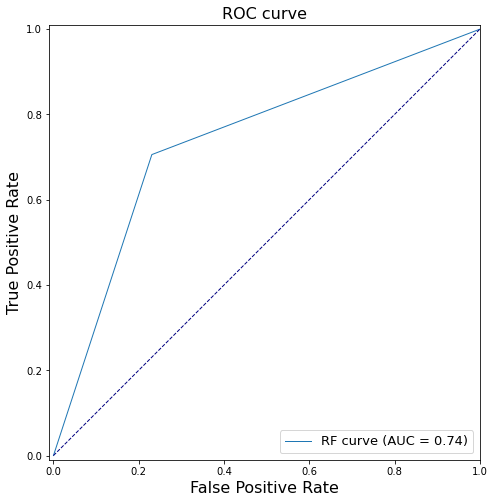

ICA Transformed - 20 dimensions is :-
[[20  6]
 [12 22]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        26
           1       0.79      0.65      0.71        34

    accuracy                           0.70        60
   macro avg       0.71      0.71      0.70        60
weighted avg       0.72      0.70      0.70        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


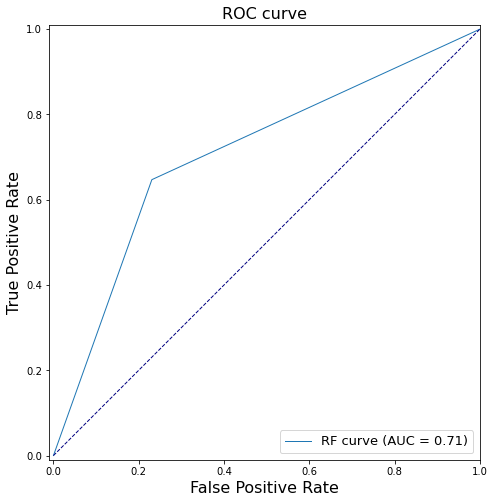

ICA Transformed - 21 dimensions is :-
[[21  5]
 [11 23]]
              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.82      0.68      0.74        34

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.75      0.73      0.73        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


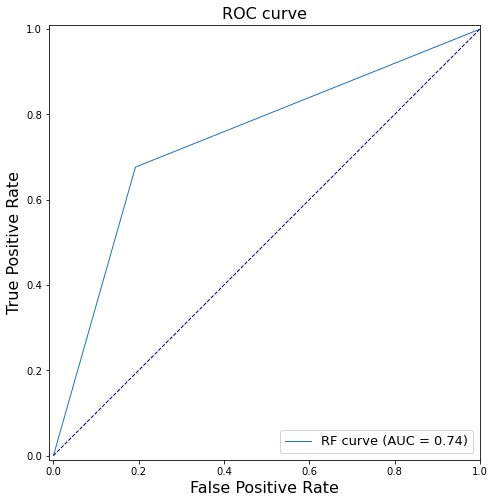

ICA Transformed - 22 dimensions is :-
[[22  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.87      0.79      0.83        34

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


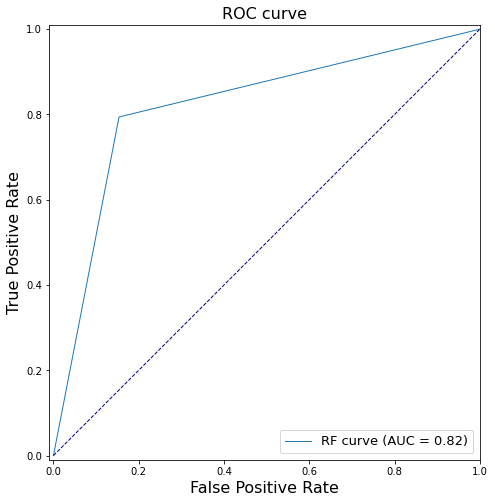

ICA Transformed - 23 dimensions is :-
[[22  4]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.87      0.76      0.81        34

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


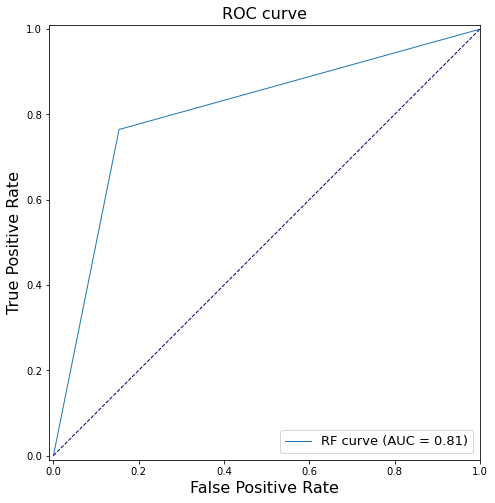

ICA Transformed - 24 dimensions is :-
[[22  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.87      0.79      0.83        34

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


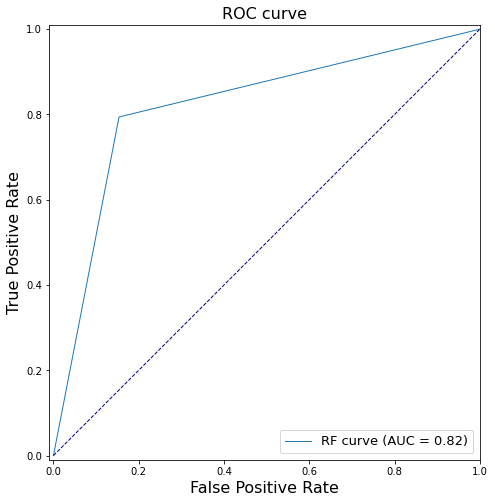

ICA Transformed - 25 dimensions is :-
[[23  3]
 [10 24]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        26
           1       0.89      0.71      0.79        34

    accuracy                           0.78        60
   macro avg       0.79      0.80      0.78        60
weighted avg       0.81      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


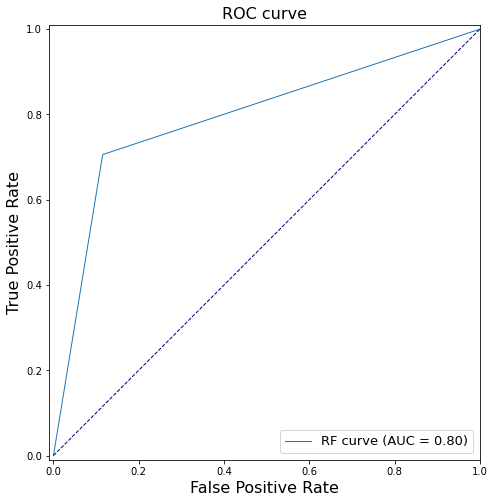

ICA Transformed - 26 dimensions is :-
[[23  3]
 [12 22]]
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.88      0.65      0.75        34

    accuracy                           0.75        60
   macro avg       0.77      0.77      0.75        60
weighted avg       0.78      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


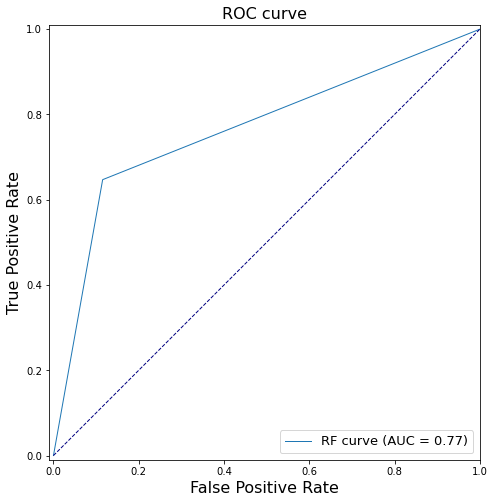

ICA Transformed - 27 dimensions is :-
[[22  4]
 [10 24]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.86      0.71      0.77        34

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.78      0.77      0.77        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


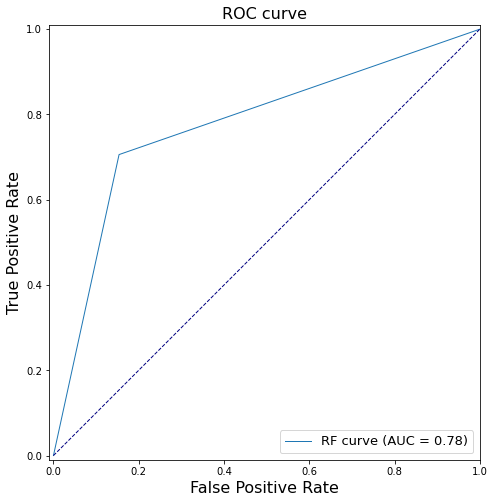

ICA Transformed - 28 dimensions is :-
[[22  4]
 [11 23]]
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        26
           1       0.85      0.68      0.75        34

    accuracy                           0.75        60
   macro avg       0.76      0.76      0.75        60
weighted avg       0.77      0.75      0.75        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


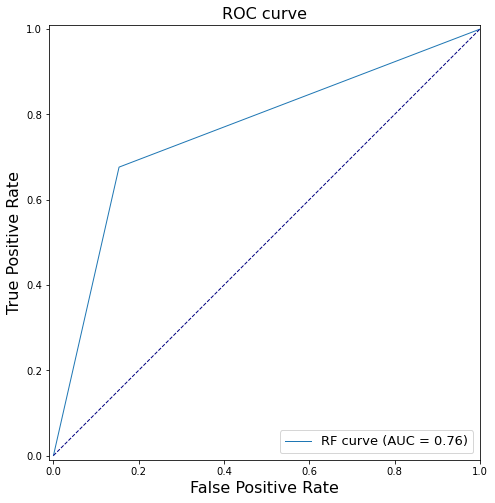

ICA Transformed - 29 dimensions is :-
[[24  2]
 [10 24]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        26
           1       0.92      0.71      0.80        34

    accuracy                           0.80        60
   macro avg       0.81      0.81      0.80        60
weighted avg       0.83      0.80      0.80        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


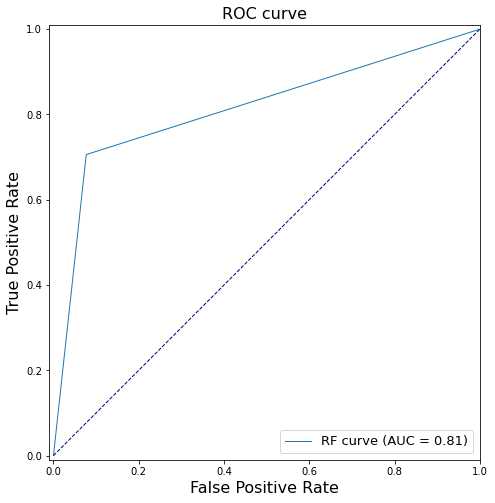

In [8]:
#Checking for best ICA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (3,30):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    print("ICA Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_ica, Y)

Best ICA Transformed in 9 dimensions is :-
[[20  6]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        26
           1       0.82      0.79      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



<ipython-input-2-0601dd2a7fd9>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


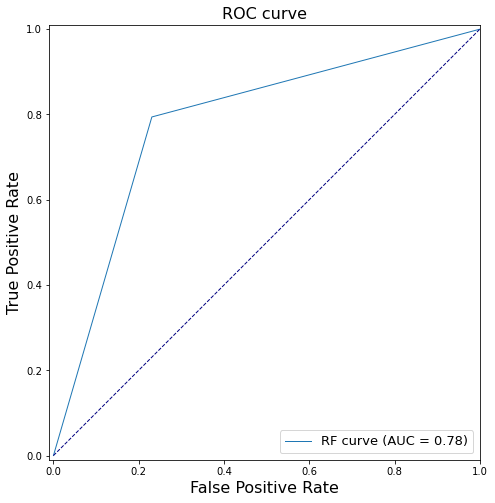

In [13]:
#Plotting Best ICA
ica = FastICA(n_components=9)
X_ica = ica.fit_transform(X)
print("Best ICA Transformed in 9 dimensions is :-" )
forest_test(X_ica, Y)